## Renewable Energy EDA and ML

#### EDA: Renewable Energy (RE) Share & energy production sources

+ Electricity generation from RE for World, Europe & Germany timeseries over years.
+ RE share from different sources for World, Europe & Germany. 

In [4]:
# Import dependencies
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [5]:
# Load the data file : Percentage of Electricity generated from Renewable Energy
df04_shaEle = pd.read_csv('Data/04 share-electricity-renewables.csv')

In [6]:
# Create a new 'Year' column
df04_shaEle['yr'] = df04_shaEle.Year
df04_shaEle = df04_shaEle.set_index('yr')
df04_shaEle.head(2)

,Entity,Code,Year,Renewables (% electricity)
yr,,,,
2000,Afghanistan,AFG,2000,65.957440
2001,Afghanistan,AFG,2001,84.745766


In [7]:
# Percentage Renewable production for Germany
df04_shaEle_ger = df04_shaEle[df04_shaEle['Entity'] == 'Germany']
df04_shaEle_eur = df04_shaEle[df04_shaEle['Entity'] == 'Europe']
df04_shaEle_wor = df04_shaEle[df04_shaEle['Entity'] == 'World']
print(df04_shaEle_ger.shape)

(38, 4)


<AxesSubplot: title={'center': 'Renewable Energy share : Germany'}, xlabel='Year'>

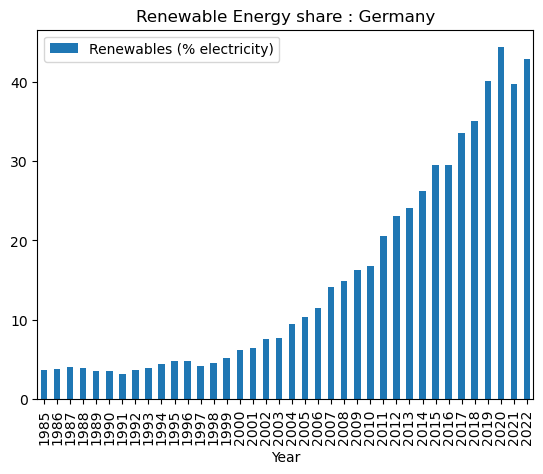

In [8]:
# Plot share of Renewable Energy for Germany alone

df04_shaEle_ger.plot(kind='bar', x='Year', y='Renewables (% electricity)', title='Renewable Energy share : Germany')#, stacked='False', )

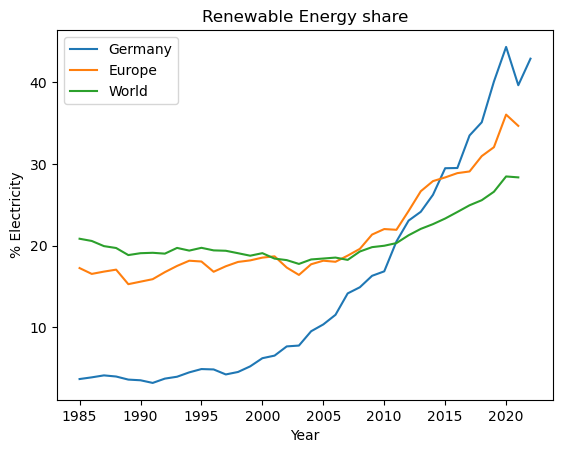

In [9]:
# Compare between Germany-Europe-World
ax = df04_shaEle_ger.plot(x='Year', y='Renewables (% electricity)', ylabel= '% Electricity') #, title='Renewable Energy share : Germany')
df04_shaEle_eur.plot(ax = ax, x='Year', y='Renewables (% electricity)', title='Renewable Energy share')
df04_shaEle_wor.plot(ax = ax, x='Year', y='Renewables (% electricity)') #, title='Renewable Energy share : World')
ax.legend(['Germany', 'Europe', 'World'])

The steep rise in Germany's Renewable Energy share from late 1990's. The share for the world and europe also rises from late 2000

#### Renewable energy production from different sources
+ Various Renewable Energy production sourcres are available in the dataset
+ Electricity from Wind, Hydro, Solar and Other sources including bioenergy in Terawatthour (TWh)

In [10]:
# Read the dataset on renewable energy production sources
df03_modRenewProd = pd.read_csv('Data/03 modern-renewable-prod.csv')
df03_modRenewProd['yr'] = df03_modRenewProd.Year
df03_modRenewProd = df03_modRenewProd.set_index('yr')
df03_modRenewProd.head(3)

,Entity,Code,Year,Electricity from wind (TWh),Electricity from hydro (TWh),Electricity from solar (TWh),Other renewables including bioenergy (TWh)
yr,,,,,,,
2000,Afghanistan,AFG,2000,0.0,0.31,0.0,0.0
2001,Afghanistan,AFG,2001,0.0,0.50,0.0,0.0
2002,Afghanistan,AFG,2002,0.0,0.56,0.0,0.0


In [11]:
# Define a function to create stacked bar plots for different production sources
def plot_stacked_bar(data, series_labels, category_labels=None, 
                     show_values=False, value_format="{}", y_label=None, 
                     colors=None, grid=True, reverse=False):
    """Plots a stacked bar chart with the data and labels provided.

    Keyword arguments:
    data            -- 2-dimensional numpy array or nested list
                       containing data for each series in rows
    series_labels   -- list of series labels (these appear in
                       the legend)
    category_labels -- list of category labels (these appear
                       on the x-axis)
    show_values     -- If True then numeric value labels will 
                       be shown on each bar
    value_format    -- Format string for numeric value labels
                       (default is "{}")
    y_label         -- Label for y-axis (str)
    colors          -- List of color labels
    grid            -- If True display grid
    reverse         -- If True reverse the order that the
                       series are displayed (left-to-right
                       or right-to-left)
    """

    ny = len(data[0])
    ind = list(range(ny))

    axes = []
    cum_size = np.zeros(ny)

    data = np.array(data)

    if reverse:
        data = np.flip(data, axis=1)
        category_labels = reversed(category_labels)

    for i, row_data in enumerate(data):
        color = colors[i] if colors is not None else None
        axes.append(plt.bar(ind, row_data, bottom=cum_size, 
                            label=series_labels[i], color=color))
        cum_size += row_data

    if category_labels:
        plt.xticks(ind, category_labels)
        #plt.setp(category_labels, rotation=90)

    if y_label:
        plt.ylabel(y_label)

    plt.legend()

    if grid:
        plt.grid()

    if show_values:
        for axis in axes:
            for bar in axis:
                w, h = bar.get_width(), bar.get_height()
                plt.text(bar.get_x() + w/2, bar.get_y() + h/2, 
                         value_format.format(h), ha="center", 
                         va="center")

In [12]:
df03_modRenewProd.head(2)

,Entity,Code,Year,Electricity from wind (TWh),Electricity from hydro (TWh),Electricity from solar (TWh),Other renewables including bioenergy (TWh)
yr,,,,,,,
2000,Afghanistan,AFG,2000,0.0,0.31,0.0,0.0
2001,Afghanistan,AFG,2001,0.0,0.50,0.0,0.0


In [13]:
# Define a function to choose a country
# Choose the country below e.g. Germany, India, Italy or continents like Europe, Asia or World
coun = 'Europe'
print('Country/Region choosen : ', coun)
def countryname(coun):

    df03_modRenewProd_coun = df03_modRenewProd[(df03_modRenewProd['Entity'] == coun) & 
                                          (df03_modRenewProd['Year'] > 1985) & (df03_modRenewProd['Year'] <= 2020)]
    
    # Convert everything to list
    df03_Win_coun = (df03_modRenewProd_coun['Electricity from wind (TWh)']).to_list()
    df03_Hyd_coun = (df03_modRenewProd_coun['Electricity from hydro (TWh)']).to_list()
    df03_Sol_coun = (df03_modRenewProd_coun['Electricity from solar (TWh)']).to_list()
    df03_Oth_coun = (df03_modRenewProd_coun['Other renewables including bioenergy (TWh)']).to_list()

    # Input for the plotting function
    dfData_coun = [df03_Win_coun, df03_Hyd_coun, df03_Sol_coun, df03_Oth_coun]
    
    return dfData_coun

# Define function to list the years you choose to see
# from 1986-2020, the data is most consistent, thus this interval is choosen. 
def years():
    df03_modRenewProd_coun = df03_modRenewProd[(df03_modRenewProd['Entity'] == coun) & 
                                          (df03_modRenewProd['Year'] > 1985) & (df03_modRenewProd['Year'] <= 2020)]
    
    # Input for the plotting function
    df03_Yr_coun = (df03_modRenewProd_coun['Year']).to_list()
    return df03_Yr_coun    

series_labels = ['Wind', 'Hydro', 'Solar', 'Others']
# countryname(coun)
# years()


Country/Region choosen :  Europe


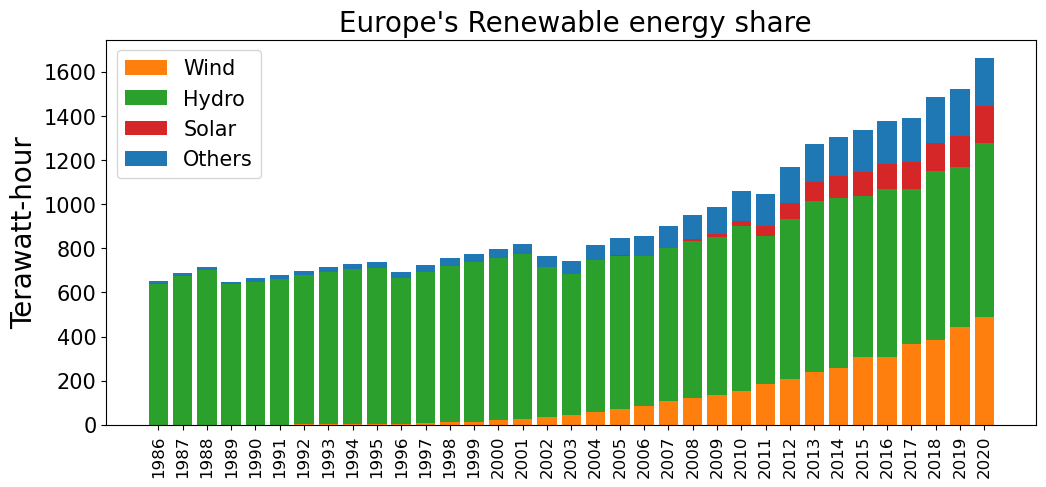

In [14]:
# Plot the figure

plt.figure(figsize=(12, 5))

plot_stacked_bar( countryname(coun), series_labels, category_labels=years(), 
    show_values=False, value_format="{:.1f}",
    colors=['tab:orange', 'tab:green', 'tab:red', 'tab:blue'],
    y_label="Terawatt-hour" )

message = f" {coun}'s Renewable energy share"
plt.title(message , fontdict = {'fontsize' : 20})
plt.xticks(rotation=90, ha='center', fontsize=12)
plt.yticks(fontsize=15)
plt.ylabel('Terawatt-hour', fontsize=20)
plt.legend(fontsize=15)
plt.grid(False)
#plt.savefig('bar.png', dpi=600)
plt.show()

Country/Region choosen :  Germany


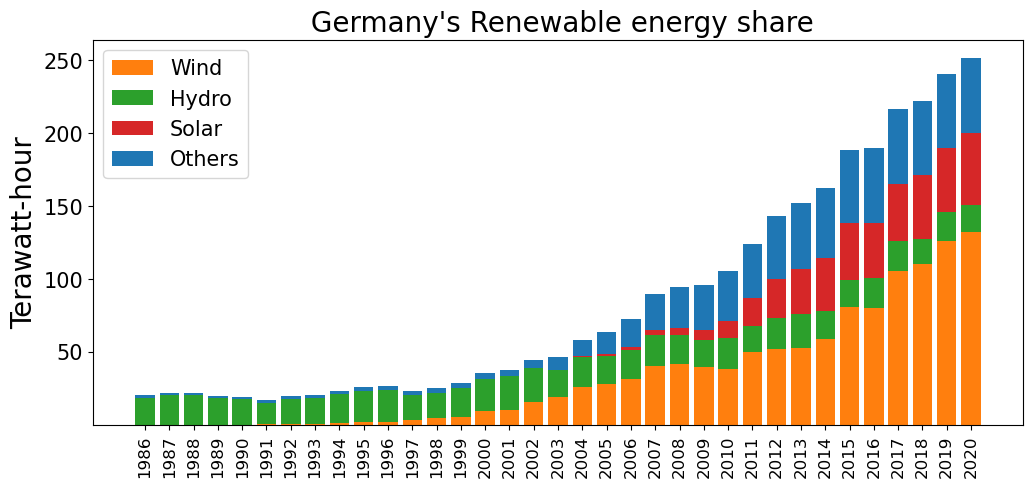

In [15]:
# Choose the country/region to the same as above

coun='Germany'            # Choose the country
print('Country/Region choosen : ', coun)
plt.figure(figsize=(12, 5))

plot_stacked_bar( countryname(coun), series_labels, category_labels=years(), 
    show_values=False, value_format="{:.1f}",
    colors=['tab:orange', 'tab:green', 'tab:red', 'tab:blue'],
    y_label="Terawatt-hour" )

message = f" {coun}'s Renewable energy share"
plt.title(message , fontdict = {'fontsize' : 20})
plt.xticks(rotation=90, ha='center', fontsize=12)
plt.yticks(fontsize=15)
plt.ylabel('Terawatt-hour', fontsize=20)
plt.legend(fontsize=15)
plt.grid(False)
#plt.savefig('bar.png', dpi=600)
plt.show()

#### Renewable Energy production for the Worldwide : 2020

/tmp/ipykernel_24144/248735409.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  WorldValues.drop(['Entity', 'Code', 'Year'], axis=1, inplace=True)
/tmp/ipykernel_24144/248735409.py:8: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-pastel")


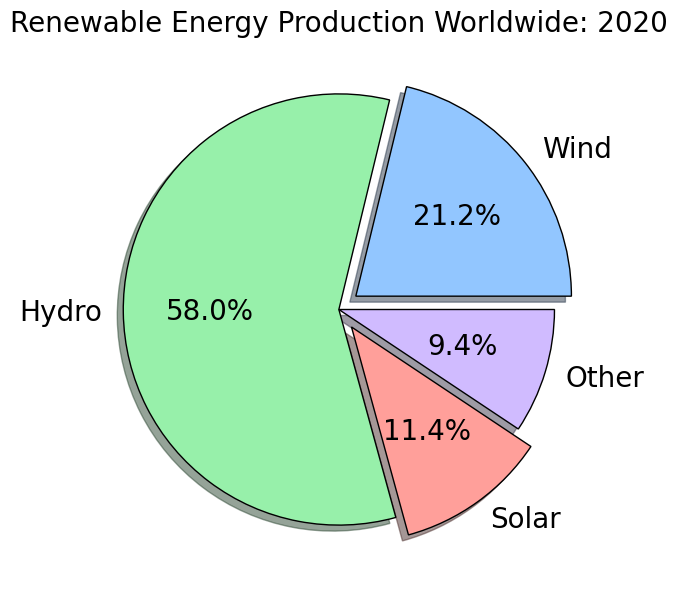

In [16]:
# Renewable Energy production for the World in 2020

WorldValues = df03_modRenewProd[(df03_modRenewProd.Year == 2020) & (df03_modRenewProd.Entity == 'World')]
# Drop all columns not containing consumption data for creating a pie chart
WorldValues.drop(['Entity', 'Code', 'Year'], axis=1, inplace=True)
myexplode = [0.1, 0 , 0.1, 0]

plt.style.use("seaborn-pastel")
plt.figure(figsize = (7,7)); plt.title('Renewable Energy Production Worldwide: 2020', fontdict = {'fontsize' : 20})
plt.pie(WorldValues.iloc[0], labels = ['Wind', 'Hydro', 'Solar', 'Other'], explode=myexplode, shadow=True, autopct='%1.1f%%',
         wedgeprops = {'edgecolor':'black'}, textprops={'fontsize': 20})
#plt.savefig('pie.png', dpi=1200)
plt.show()

#### Compare for 2020: Renewable Energy production : World vs Choose your country

In [17]:
# Select Country to compare with Europe values

country  = 'Germany'          # Select country to compare  
print('Choosen country/region to compare with the World : ', country)

labels = 'Wind', 'Hydro', 'Solar', 'Others'

df03_modRenewProd['yr'] = df03_modRenewProd.Year
df03_modRenewProd = df03_modRenewProd.set_index('yr')

UserCountry = df03_modRenewProd[(df03_modRenewProd.Year == 2020) & (df03_modRenewProd.Entity == country)]
UserCountry.drop(['Entity', 'Code', 'Year'], axis=1, inplace=True)

Choosen country/region to compare with the World :  Germany


/tmp/ipykernel_24144/2053618850.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  UserCountry.drop(['Entity', 'Code', 'Year'], axis=1, inplace=True)


Comparison


/tmp/ipykernel_24144/3290765094.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  EuropeValues.drop(['Entity', 'Code', 'Year'], axis=1, inplace=True)


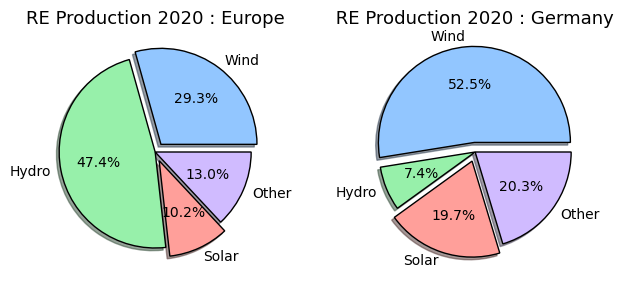

In [18]:
# Plot figure side by side
# Data for Europe 
EuropeValues = df03_modRenewProd[(df03_modRenewProd.Year == 2020) & (df03_modRenewProd.Entity == 'Europe')]
EuropeValues.drop(['Entity', 'Code', 'Year'], axis=1, inplace=True)
EuropeValuesList = EuropeValues.values.tolist()[0]

# Plot
fig = plt.figure()
print('Comparison')
ax1 = fig.add_axes([0, 0, .5, .5], aspect=1)
#ax1.pie(fracs, labels=labels, radius = 1.2)
ax1.pie(EuropeValuesList, labels = ['Wind', 'Hydro', 'Solar', 'Other'], explode=myexplode, shadow=True, autopct='%1.1f%%',
          wedgeprops = {'edgecolor':'black'}, textprops={'fontsize': 10})
ax2 = fig.add_axes([.5, .0, .5, .5], aspect=1)
ax2.pie(UserCountry.iloc[0], labels = ['Wind', 'Hydro', 'Solar', 'Other'], explode=myexplode, shadow=True, autopct='%1.1f%%',
         wedgeprops = {'edgecolor':'black'}, textprops={'fontsize': 10})
ax1.set_title('RE Production 2020 : Europe', fontdict = {'fontsize' : 13})

message = f" RE Production 2020 : {country} "
ax2.set_title(message , fontdict = {'fontsize' : 13})
plt.show()

#### Renewable Energy Prediction for year 2021 (Machine Learning)

In [19]:
# Import dependencies

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.linear_model import PoissonRegressor                               # already has Ridge included
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import (mean_squared_error,r2_score, mean_squared_log_error, mean_absolute_error)
from sklearn.preprocessing import FunctionTransformer, PolynomialFeatures

from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.pipeline import make_pipeline
#from sklearn.impute import SimpleImputer
from sklearn.preprocessing import (OneHotEncoder, KBinsDiscretizer, OrdinalEncoder, StandardScaler, MinMaxScaler, PolynomialFeatures )


#### Data Preparation:
+   The number of data points are small for timeseries prediction. Apprently, it is 20 datapoints for 20 years. Time series models were applied, but the results were not that much useful. Thus to predict, certain 'features' regarding the data were explored.

+   Fortunately, installation capacity of solar, wind and geothermal sources data were available. All the installation capacity were summed up and termed as 'TotalCapacity' in the data. Unfortunately, installation capacity from hydroeclectric sources were not available, thus not included in the 'TotalCapacity'. Computation for this feature is available at the end of the Notebook. 

+   Other important feature is 'Investment on Renewable energy', which was available from https://de.statista.com for Germany. For the time being this two features can act to make a prototype model for prediction.  

+   For both the features the values for the year 2021 was available. This helps to predict for the year 2021 and also act as a validation purpose. The term 'TotalElectricity' is the prediction term, which also includes electricity from Hydro sources. Whereas, computed 'TotalCapacity' doesnot contain the Electricity from 'Hydro' source. This could lead to a uncertainity in the prediction.   

In [20]:
# Load prepared dataset : This new dataset (20model_Factors_Renewable.csv) is created taking care of the above facts. 

df20_fac = pd.read_csv('Data/20model_Factors_Renewable.csv')
df20_fac['yr'] = df20_fac.Year
df20_fac =df20_fac.set_index('yr')
df20_fac.head(2)

,Year,Investment (Billion Euros),WindCapacity,SolarCapacity,GeothermalCapacity,TotalCapacity,Electricity from wind (TWh),Electricity from hydro (TWh),Electricity from solar (TWh),Other renewables including bioenergy (TWh),TotalElectricity (TWh)
yr,,,,,,,,,,,
2001,2001,6.28,8.754,0.195,0.0,8.949,10.46,22.73,0.12,4.59,37.90
2002,2002,6.96,12.001,0.260,0.0,12.261,15.86,23.12,0.19,5.31,44.48


<AxesSubplot: >

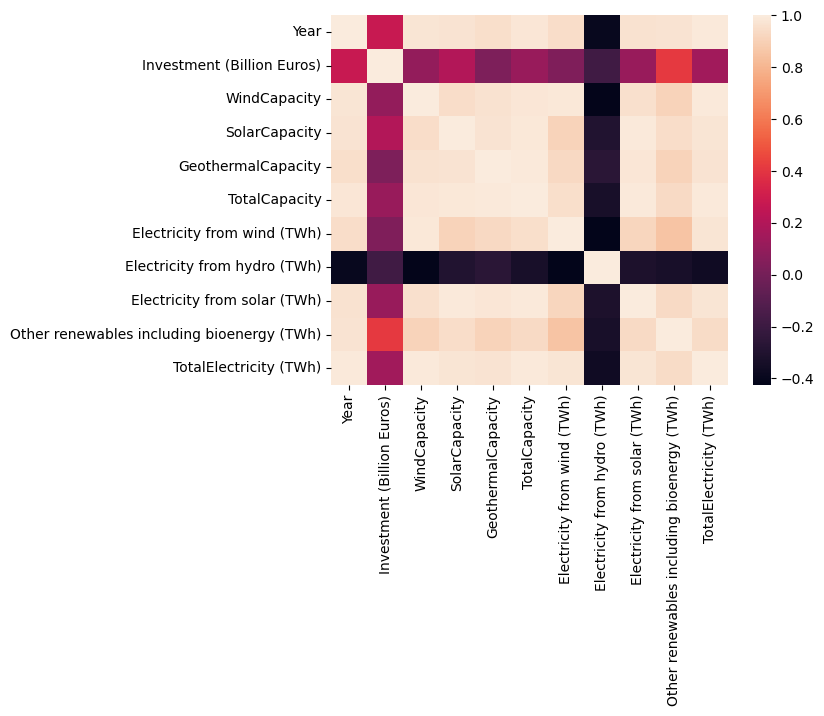

In [21]:
# Check correlation between variables
sns.heatmap(df20_fac.corr())

The correlation between TotalCapacity and TotalElectricity are positive. Electricity fro Hydro sources have negative correlation with other variables.

In [22]:
# Define X and y
X = df20_fac[['Year', 'Investment (Billion Euros)', 'TotalCapacity']]       # Feature variables
y = df20_fac['TotalElectricity (TWh)']                                      # Prediction variable

In [23]:
# Make a Train-Test-Split
Xtrain, Xval, ytrain, yval = train_test_split(X, y, test_size=0.20, random_state=41) #Xtrain... dependent on test size 

print(Xtrain.shape, Xval.shape, ytrain.shape, yval.shape)

(16, 3) (4, 3) (16,) (4,)


In [24]:
# Linear Regression Model

lgr = LinearRegression()                               
lgr.fit(Xtrain,ytrain)

# Predict
pred_Xval = lgr.predict(Xval)
pred_Xtrain = lgr.predict(Xtrain)
print('Linear Regression scores')
print('Val-r2 (yval, pred_Xval)         :',r2_score(yval, pred_Xval), ' \nTrain-r2 (ytrain, pred_Xtrain)   :', r2_score(ytrain, pred_Xtrain))


Linear Regression scores
Val-r2 (yval, pred_Xval)         : 0.973883058596648  
Train-r2 (ytrain, pred_Xtrain)   : 0.9961289597759132


In [25]:
# Feature Engineering to our features
# Investment in Renewable Energy : First binning, Polynomial features and then minmax scaler
# Total Installed capacity : First binning, Polynomial features and then minmax scaler
# Year : No feature engineering
fe = ColumnTransformer([
    ("bin_Inv", KBinsDiscretizer(n_bins=4), ['Investment (Billion Euros)']),
    ('bin_Ins', KBinsDiscretizer(n_bins=4), ['TotalCapacity']),
    ("polynom_var", PolynomialFeatures(degree=2,interaction_only=False),['Investment (Billion Euros)','TotalCapacity']),
    ("sca_var", MinMaxScaler(), ['Investment (Billion Euros)', 'TotalCapacity']),
    ("pass_var", 'passthrough', ['Year'])    
])
fe

ColumnTransformer(transformers=[('bin_Inv', KBinsDiscretizer(n_bins=4),
                                 ['Investment (Billion Euros)']),
                                ('bin_Ins', KBinsDiscretizer(n_bins=4),
                                 ['TotalCapacity']),
                                ('polynom_var', PolynomialFeatures(),
                                 ['Investment (Billion Euros)',
                                  'TotalCapacity']),
                                ('sca_var', MinMaxScaler(),
                                 ['Investment (Billion Euros)',
                                  'TotalCapacity']),
                                ('pass_var', 'passthrough', ['Year'])])

In [26]:
# Transforming the data
Xtrain_fetran = fe.fit_transform(Xtrain)        # Fit & transform Xtrain (training data)
Xtrain_fetran = pd.DataFrame(Xtrain_fetran)     # Convert to Dataframe

Xval_fetran = fe.transform(Xval)                # Transform Xval (validation data)


In [27]:
# Use different Machine learning models for validation and prediction
#model = LinearRegression()
#        OR
model = Ridge(alpha=0.5)
#        OR
#model = Lasso(alpha=0.5)
#        OR
#model = RandomForestRegressor(n_estimators=50, max_depth=10)
#        OR

model.fit(Xtrain_fetran,ytrain)           # Fit the model

# Predict the y
pred_Xvalfe = model.predict(Xval_fetran)
pred_Xtrainfe = model.predict(Xtrain_fetran)
print('Model scores')
print('Val-r2    : ',r2_score(yval, pred_Xvalfe), ';  Train-r2    :', r2_score(ytrain, pred_Xtrainfe))

Model scores
Val-r2    :  0.8916301603637462 ;  Train-r2    : 0.9992661858193219


In [28]:
# Create the future timestamp (year 2021) : for Predicting/Forecasting

timestep = X['Year'].max() + 1          # Create new timestep for 2021
Investment = 13.35                      # This value is available in the original data
TotalCapacity = 164.219                 # This value is available in the original data

X_future = [timestep]                   # Create columns
X_future.append(Investment)
X_future.append(TotalCapacity)
X_future = pd.DataFrame([X_future])     # Convert X_future to a datadrame
X_future.columns = Xtrain.columns       # Make columns consistent for X_future dataframe

In [29]:
# Transform the future timestep data
transXfut = fe.transform(X_future)

# Predict the future timestep
model.predict(transXfut)

array([276.87651613])

#### Note : 
+   The Prediction results from all the models were compiled and stored in a csv file (model_pre.csv). Above all this file is an extension the csv file used above for machine learning. The only extra rows are the prediction in the new file. This is done to bring easiness in plotting.

In [30]:
# All model results are stored in a csv file
# Load the csv file for visualization/plotting
df21_pred = pd.read_csv('Data/model_pre.csv')
df_ts = pd.to_datetime(df21_pred['Year'])
tmdf = pd.date_range("2001", periods=len(df_ts), freq="Y")
df21_pred['Year'] = tmdf
df21_pred.columns

Index(['Year', 'Investment (Billion Euros)', 'WindCapacity', 'SolarCapacity',
       'GeothermalCapacity', 'TotalCapacity', 'Electricity from wind (TWh)',
       'Electricity from hydro (TWh)', 'Electricity from solar (TWh)',
       'Other renewables including bioenergy (TWh)', 'TotalElectricity (TWh)',
       'LR (No FE)', 'LR (FE)', 'Ridge (FE)', 'Lasso (FE)', 'RFR (FE)'],
      dtype='object')

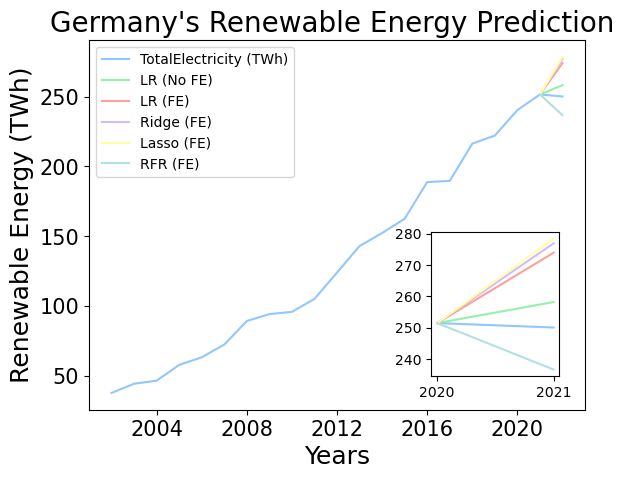

In [31]:
# Plot the results

df21_pred_plot = df21_pred.set_index('Year')
df21_pred_plot = df21_pred_plot[['TotalElectricity (TWh)',
       'LR (No FE)', 'LR (FE)', 'Ridge (FE)', 'Lasso (FE)', 'RFR (FE)']]
plt.xlabel('Years', size = 18); plt.ylabel('Renewable Energy (TWh)', size = 18)
plt.xticks(size = 15); plt.yticks(size = 15)
plt.title("Germany's Renewable Energy Prediction ", size = 20)
plt.plot(df21_pred_plot)

plt.gca().legend(df21_pred_plot)
sub_axes = plt.axes([.66, .18, .2, .3])     # Plot a zoomed figure for better visualization 'prediction part'
x = ['2020','2021']
y = df21_pred_plot['2020':]                         # Extract for last 2 years
sub_axes.plot(x,y)
plt.show()

#plt.savefig('MLprediction.png')

### Extras
#### Feature : TotalCapacity i.e. 'Installed Renewable Energy' computation

+ Below installed capacity from different sources are added to create the feature 'TotalCapacity'

+ Separate files were available for this from the original file.

In [32]:
# Load files 
df09_InsWE = pd.read_csv('Data/09 cumulative-installed-wind-energy-capacity-gigawatts.csv')
df13_InsSE = pd.read_csv('Data/13 installed-solar-PV-capacity.csv')
df17_InsGE = pd.read_csv('Data/17 installed-geothermal-capacity.csv')

# Select Germany
df09_InsWE_ger = df09_InsWE[df09_InsWE['Entity'] == 'Germany'] ; 
df13_InsSE_ger = df13_InsSE[df13_InsSE['Entity'] == 'Germany'] ; 
df17_InsGE_ger = df17_InsGE[df17_InsGE['Entity'] == 'Germany'] ; 
#df09_InsWE_ger.plot(x="Year", y=["Wind Capacity"])
#plt.show()

<AxesSubplot: title={'center': 'Installed Renewable Energy : Germany'}, xlabel='Year', ylabel='Terawatt-hour (TWh)'>

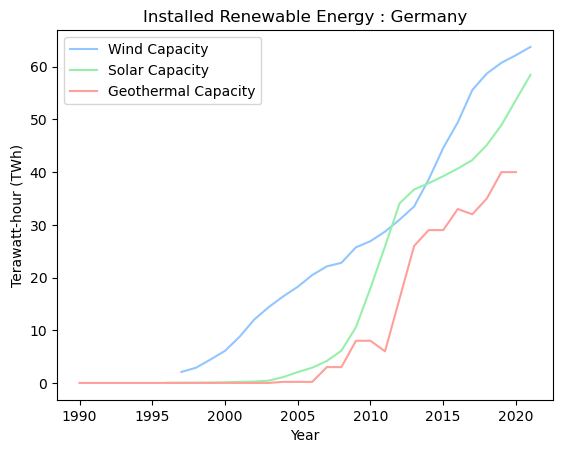

In [33]:
# Visualise the different sources for Germany as timeseries
ax = df09_InsWE_ger.plot(x="Year", y=["Wind Capacity"], ylabel='Terawatt-hour (TWh)')
df13_InsSE_ger.plot(ax = ax, x="Year", y=["Solar Capacity"], title='Installed Renewable Energy : Germany')
df17_InsGE_ger.plot(ax = ax, x="Year", y=["Geothermal Capacity"])

In [34]:
# Select the years: 2001-2020
df09_InsWE_ger = df09_InsWE_ger.loc[(df09_InsWE_ger['Year'] > 2000) & (df09_InsWE_ger['Year'] < 2021)]
df13_InsSE_ger = df13_InsSE_ger.loc[(df13_InsSE_ger['Year'] > 2000) & (df13_InsSE_ger['Year'] < 2021)]
df17_InsGE_ger = df17_InsGE_ger.loc[(df17_InsGE_ger['Year'] > 2000) & (df17_InsGE_ger['Year'] < 2021)]

#### Feature: 'Total Electricity' production computation

+   The file '03 modern-renewable-prod.csv' contains electricity produced from different sources.

+   All different sources were added to generate a new column 'Total Elctricity' 

In [35]:
# Summing up Production Values from RE
df03_modRenewProd = pd.read_csv('Data/03 modern-renewable-prod.csv')
df03_modRenewProd['yr'] = df03_modRenewProd.Year
df03_modRenewProd = df03_modRenewProd.set_index('yr')

df03_modRenewProd_ger = df03_modRenewProd[df03_modRenewProd['Entity'] == 'Germany']
df03_modRenewProd_ger.head(3)
#df03_modRenewProd.head(3)

,Entity,Code,Year,Electricity from wind (TWh),Electricity from hydro (TWh),Electricity from solar (TWh),Other renewables including bioenergy (TWh)
yr,,,,,,,
1965,Germany,DEU,1965,0.0,16.212210,0.0,0.0
1966,Germany,DEU,1966,0.0,17.533998,0.0,0.0
1967,Germany,DEU,1967,0.0,16.652311,0.0,0.0


In [36]:
# Select the years: 2001-2020
df03_modRenewProd_gerYR = df03_modRenewProd.loc[(df03_modRenewProd['Year'] > 2000) & (df03_modRenewProd['Year'] < 2021) & (df03_modRenewProd['Entity'] == 'Germany') ]

In [37]:
# Summing up Electricity from different Renewable Energy sources.
df03_modRenewProd_gerYR["sum"] = df03_modRenewProd_gerYR["Electricity from wind (TWh)"] + df03_modRenewProd_gerYR['Electricity from hydro (TWh)']  + df03_modRenewProd_gerYR['Electricity from solar (TWh)'] + df03_modRenewProd_gerYR['Other renewables including bioenergy (TWh)']

df03_modRenewProd_gerYR.head(2)

/tmp/ipykernel_24144/699800299.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df03_modRenewProd_gerYR["sum"] = df03_modRenewProd_gerYR["Electricity from wind (TWh)"] + df03_modRenewProd_gerYR['Electricity from hydro (TWh)']  + df03_modRenewProd_gerYR['Electricity from solar (TWh)'] + df03_modRenewProd_gerYR['Other renewables including bioenergy (TWh)']


,Entity,Code,Year,Electricity from wind (TWh),Electricity from hydro (TWh),Electricity from solar (TWh),Other renewables including bioenergy (TWh),sum
yr,,,,,,,,
2001,Germany,DEU,2001,10.46,22.73,0.12,4.59,37.90
2002,Germany,DEU,2002,15.86,23.12,0.19,5.31,44.48
